In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from optimisation.parallel_cma import CmaesData

In [37]:
folder = 'outcmaes_pmm/18991040/'
df = pd.read_csv(folder + 'fit.dat', sep=' ', usecols=[0,1,2,3,4,5,6,7],
                 names=['iter', 'eval', 'sigma', 'axis ratio', 'bestever', 'best', 'median', 'worst'], skiprows=1)

In [38]:
df.head()

,iter,eval,sigma,axis ratio,bestever,best,median,worst
0,1,24,0.461405,1.000033,0.048782,0.048782,0.230639,0.550204
1,2,48,0.406687,1.489336,0.048782,0.129327,0.211654,0.329322
2,3,72,0.357833,1.762066,0.048782,0.067952,0.211635,0.377381
3,4,96,0.412602,2.201533,0.031675,0.031675,0.155391,0.250014
4,5,120,0.353378,3.621109,0.031675,0.057562,0.131117,0.211884


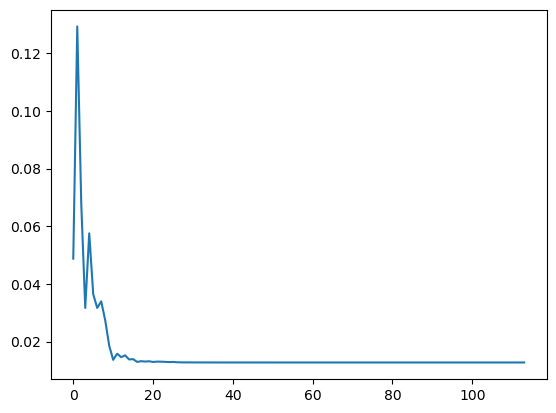

In [39]:
plt.figure()
plt.plot(df['best'])
plt.show()

In [40]:
df2 = pd.read_csv(folder + 'xmean.dat', sep=' ', usecols=[0,1,5,6,7],
                 names=['iter', 'eval', 'x1', 'x2', 'x3'], skiprows=1)

df3 = pd.read_csv(folder + 'stddev.dat', sep=' ', usecols=[0,1,2,5,6,7],
                 names=['iter', 'eval', 'sigma', 'std_x1', 'std_x2', 'std_x3'], skiprows=1)

x0 = np.array([0, 0, 0])

d = []
d.insert(0, {'iter':0, 'eval':0, 'x1':x0[0], 'x2':x0[1], 'x3':x0[2]})
df2 = pd.concat([pd.DataFrame(d), df2], ignore_index=True)

d2 = []
d2.insert(0, {'iter':0, 'eval':0, 'sigma':0.5, 'std_x1':0.5, 'std_x2':0.5, 'std_x3':0.5})
df3 = pd.concat([pd.DataFrame(d2), df3], ignore_index=True)

In [41]:
df2.head()

,iter,eval,x1,x2,x3
0,0,0,0.000000,0.000000,0.000000
1,1,24,-0.033676,0.241407,0.031149
2,2,48,0.034274,0.159533,-0.080564
3,3,72,-0.027360,0.032572,-0.016143
4,4,96,-0.117696,-0.228288,-0.122509


In [42]:
df3.head()

,iter,eval,sigma,std_x1,std_x2,std_x3
0,0,0,0.500000,0.500000,0.500000,0.500000
1,1,24,0.461405,0.372550,0.479747,0.358654
2,2,48,0.406687,0.262457,0.401942,0.291344
3,3,72,0.357833,0.190424,0.347532,0.214986
4,4,96,0.412602,0.208365,0.493332,0.214713


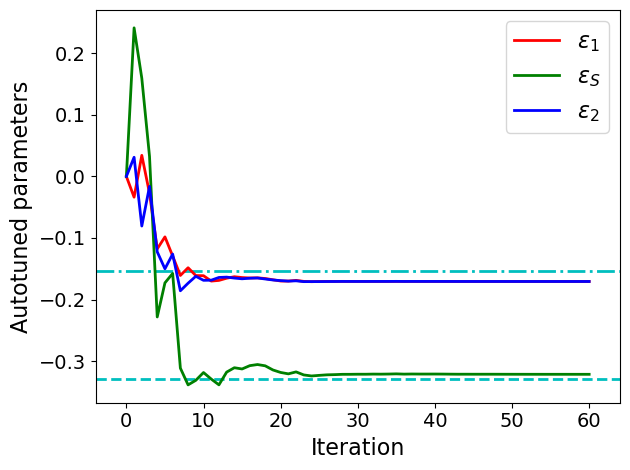

In [43]:
plt.figure()

plt.axhline(y=-0.15355, ls='-.', lw=2, color='c')
plt.axhline(y=-0.32894, ls='--', lw=2, color='c')

#plt.axhline(y=0.0785, ls='-.', lw=2, color='m')
#plt.axhline(y=0.634, ls='--', lw=2, color='m')

plt.plot(np.arange(0,61), df2['x1'][:61], color='r', lw=2, label=r'$\varepsilon_{1}$')
plt.plot(np.arange(0,61), df2['x2'][:61], color='g', lw=2, label=r'$\varepsilon_{S}$')
plt.plot(np.arange(0,61), df2['x3'][:61], color='b', lw=2, label=r'$\varepsilon_{2}$')
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Autotuned parameters', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.xlim(-4, 64)
#plt.savefig('one_link_learning_gap_loss.svg', format='svg')
plt.show()

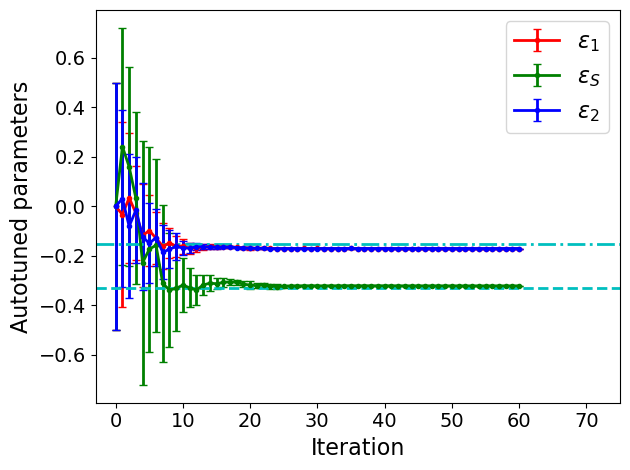

In [44]:
plt.figure()

plt.errorbar(np.arange(0,61), df2['x1'][:61], df3['std_x1'][:61], color='r', lw=2, 
             label=r'$\varepsilon_{1}$', capsize=3, alpha=1, marker='.')
plt.errorbar(np.arange(0,61), df2['x2'][:61], df3['std_x2'][:61], color='g', lw=2, 
             label=r'$\varepsilon_{S}$', capsize=3, alpha=1, marker='.')
plt.errorbar(np.arange(0,61), df2['x3'][:61], df3['std_x3'][:61], color='b', lw=2, 
             label=r'$\varepsilon_{2}$', capsize=3, alpha=1, marker='.')


plt.axhline(y=-0.15355, ls='-.', lw=2, color='c')
plt.axhline(y=-0.32894, ls='--', lw=2, color='c')

#plt.axhline(y=0.0785, ls='-.', lw=2, color='m')
#plt.axhline(y=0.634, ls='--', lw=2, color='m')

plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Autotuned parameters', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.xlim(-3, 75)
plt.savefig('figures/two_site_learning_max_loss2.svg', format='svg')
plt.show()

In [10]:
dataloader = CmaesData()
datadict = dataloader.load('outcmaes_pmm/18991040/')

In [11]:
coords = np.array([dd['coordinate'] for dd in datadict[1:]]).reshape(-1, 12, 3)

In [12]:
coords.shape

(228, 12, 3)

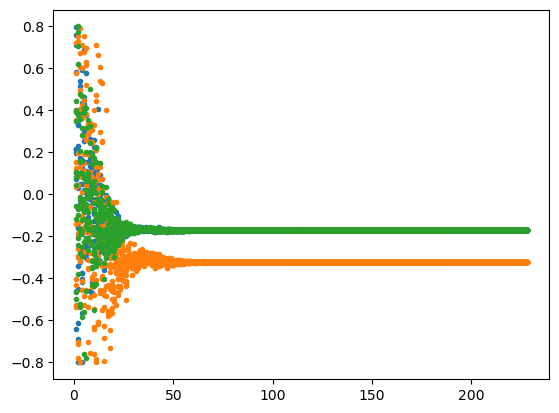

In [15]:
plt.figure()
plt.plot(np.arange(1,coords.shape[0]+1), coords[:,:,0], ls='', marker='.', color='C0')
plt.plot(np.arange(1,coords.shape[0]+1), coords[:,:,1], ls='', marker='.', color='C1')
plt.plot(np.arange(1,coords.shape[0]+1), coords[:,:,2], ls='', marker='.', color='C2')
plt.show()